# 🛍️ Retail Sales Analysis
## 🎯 Objective
This analysis aims to extract insights from sales data to support business decisions in the areas of:
- Inventory management
- Customer satisfaction
- Revenue optimization

## 🗃️ Dataset Overview
The dataset used in this analysis was sourced from [📂 *Retail Sales Dataset on Kaggle*](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset). It contains transactional records from a retail store, capturing both customer and sales-related details. The main features include:


-  Transaction ID : Unique identifier for each transaction
- Date : The date of purchase
- Customer ID : Unique identifier for each customer
- Gender : Gender of the customer
- Age : Customer's Age
- Product Category : Type of Product Purchased
- Quantity : Number of units bought
- Price Per Unit : Price of a single unit of the product
- Total Amount : Total amount paid for the transaction (Quantity x Price per unit)

We aim to understand trends, behaviors, and patterns within this data.

## ❓ Key Business Questions

1. What is the Gender distribution of customers
2. Which product categories generate the most revenue?
3. How do Sales trends change across different months of the year?
4. Which age group spends the most on retail products?
5. Relationship between Product Price and Quantity sold




📦 **Import Libraries**

In this step, we will import all necessary libraries required for data analysis and visualization, such as pandas, numpy, matplotlib, seaborn, etc.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

🧾 **Load and Preview Dataset**

In this step, we will load the dataset into a pandas DataFrame and preview the first few rows to understand its structure and contents.


In [3]:
df=pd.read_csv(r"C:\Users\joshua\Documents\Data Analytics and Machine Learning Project\Retail prices EDA\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# shape of the dataset
df.shape

(1000, 9)

The dataset has 1000 rows and 9 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Incorrect datatype for the Date column

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
# check for missing value
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

No missing values in the dataset

In [8]:
# check for duplicates
df.duplicated().sum()

0

Absence of duplicates in the dataset

In [9]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [10]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [11]:
df['Price per Unit'].unique()

array([ 50, 500,  30,  25, 300], dtype=int64)

In [12]:
df['Age'].unique()

array([34, 26, 50, 37, 30, 45, 46, 63, 52, 23, 35, 22, 64, 42, 19, 27, 47,
       62, 18, 49, 28, 38, 43, 39, 44, 51, 58, 48, 55, 20, 40, 54, 36, 31,
       21, 57, 25, 56, 29, 61, 32, 41, 59, 60, 33, 53, 24], dtype=int64)

🧹  **Data Cleaning and Preprocessing**

In [13]:
# converting the Date column from object to datetime datatype

df['Date']=pd.to_datetime(df['Date'], errors='coerce')

In [14]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

*Age Grouping*

In [15]:
bins =[15, 22, 30, 40, 55, 65]
labels=['Students (16-22)', 'Young Professionals (23-30)', 'Settled Adults (31-40)', 'Mature Adults (41-55)', 'Seniors (56-65)']
df['Age_Group']=pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [16]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Settled Adults (31-40)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young Professionals (23-30)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mature Adults (41-55)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Settled Adults (31-40)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Settled Adults (31-40)


In [17]:
# dropping irrelevant columns
df.drop(['Transaction ID', 'Age'], axis=1, inplace=True)

In [18]:
df.head()

,Date,Customer ID,Gender,Product Category,Quantity,Price per Unit,Total Amount,Age_Group
0,2023-11-24,CUST001,Male,Beauty,3,50,150,Settled Adults (31-40)
1,2023-02-27,CUST002,Female,Clothing,2,500,1000,Young Professionals (23-30)
2,2023-01-13,CUST003,Male,Electronics,1,30,30,Mature Adults (41-55)
3,2023-05-21,CUST004,Male,Clothing,1,500,500,Settled Adults (31-40)
4,2023-05-06,CUST005,Male,Beauty,2,50,100,Settled Adults (31-40)


*Extract year, month and day*

In [19]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [20]:
df.head(2)

,Date,Customer ID,Gender,Product Category,Quantity,Price per Unit,Total Amount,Age_Group,Year,Month,Day,Weekday
0,2023-11-24,CUST001,Male,Beauty,3,50,150,Settled Adults (31-40),2023,11,24,Friday
1,2023-02-27,CUST002,Female,Clothing,2,500,1000,Young Professionals (23-30),2023,2,27,Monday


📊  **Exploratory Data Analysis (EDA)**

👫 **1. What is the gender distribution of customers?**


In [21]:
sns.set(style='darkgrid')

📂 Save Plot Function – Organized Export of Visualizations

In [22]:
import os
def save_plot(filename, folder='Retail sales plot', dpi=300):
    """
    Saves the current plot to a specified folder with the given filename.
    Creates the folder if it doesn't exist.
    
    Parameters:
    - filename (str): Name of the file (e.g., 'gender_distribution.png')
    - folder (str): Folder to save the plot in (default: 'Retail sales plot')
    - dpi (int): Resolution of the image (default: 300)
    """
    if not os.path.exists(folder):
        os.makedirs(folder)
    full_path = os.path.join(folder, filename)
    plt.savefig(full_path, dpi=dpi, bbox_inches='tight')
    print(f"Plot saved to: {full_path}")


Plot saved to: Retail sales plot\Gender Distribution of Customers.png


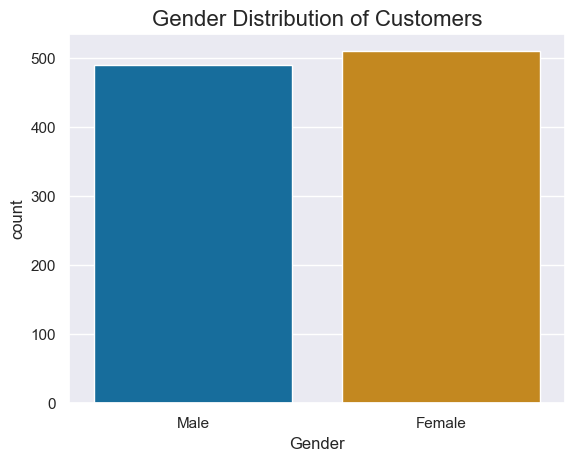

In [23]:
sns.countplot(x='Gender', data=df, palette='colorblind')
plt.title('Gender Distribution of Customers', fontsize=16)
save_plot('Gender Distribution of Customers.png')
plt.show()

 👩‍🦰👨 **Insight on Gender Distribution of Customers**

The number of male and female customers is almost the same, with **females making up 51%** and **males making up 49%**. This even split shows that the business reaches both genders equally, highlighting the need to create marketing and products that appeal to both men and women

 💰 **2. Which product categories generate the most revenue?**


Plot saved to: Retail sales plot\Total Revenue by Product Category


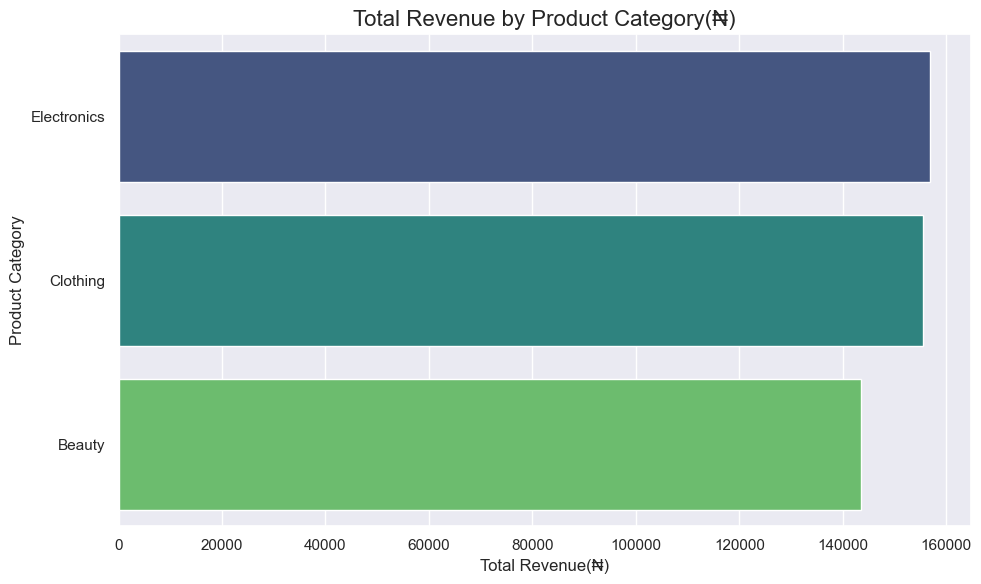

In [24]:
def plot_total_revenue_by_category(df):
    """
    Groups the dataset by product category, calculates total revenue per category, 
    sorts them in descending order, and visualizes the total revenue using a bar plot.
    """
    # Calculate total revenue per product category
    df['Revenue'] = df['Total Amount']
    revenue_by_category = df.groupby('Product Category')['Revenue'].sum().reset_index()
    revenue_by_category = revenue_by_category.sort_values(by='Revenue', ascending=False)

    # Create a bar plot for total revenue by product category
    plt.figure(figsize=(10, 6))
    sns.barplot(data=revenue_by_category,
                x='Revenue',
                y='Product Category',
                palette='viridis')

    plt.title('Total Revenue by Product Category(₦)', fontsize=16)
    plt.xlabel('Total Revenue(₦)', fontsize=12)
    plt.ylabel('Product Category', fontsize=12)
    plt.tight_layout()

    # Save the plot
    save_plot('Total Revenue by Product Category')

    # Display the plot
    plt.show()
plot_total_revenue_by_category(df)

 💸  **Insight on Product Revenue Distribution**

The bar plot reveals that **Electronics** and **Clothing** are the top-performing product categories, followed closely by **Beauty**. This implies that the business sees the most revenue from these categories. Future strategies should consider increasing focus on these high-revenue categories so as to optimize sales and inventory management.

📅 **3. How do Sales trends change across different months of the year?**

Plot saved to: Retail sales plot\Monthly Sales Trend


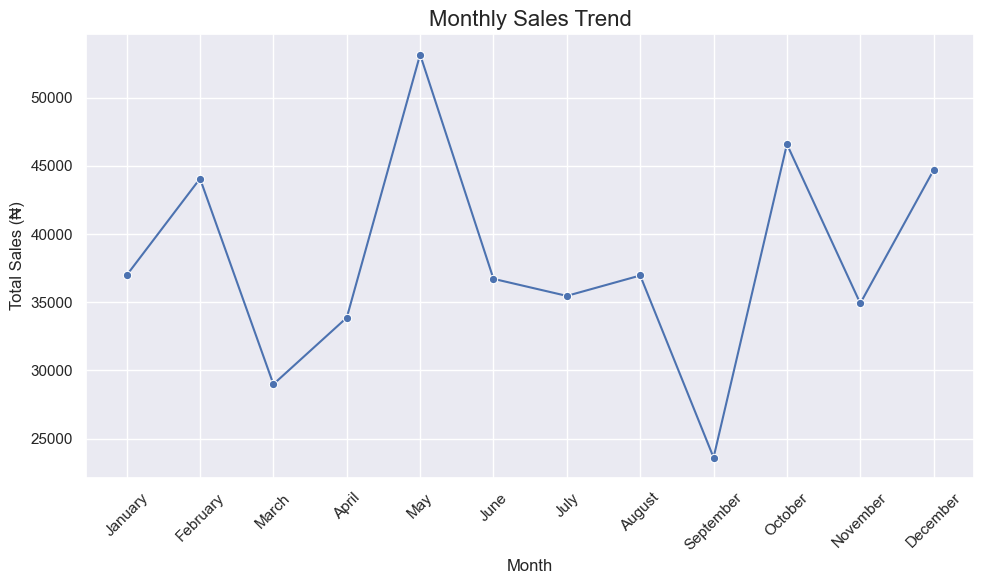

In [29]:
def plot_monthly_sales_trend(df):
    """
    Groups the dataset by month, calculates total sales per month, 
    sorts them in calendar order, and visualizes the sales trend using a line plot.
    """
    df['Month_Name'] = df['Date'].dt.strftime('%B')
    sales_by_month = df.groupby(['Month', 'Month_Name'])['Total Amount'].sum().reset_index()
    sales_by_month = sales_by_month.sort_values(by='Month')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=sales_by_month, x='Month_Name', y='Total Amount', marker='o', sort=False)

    plt.title('Monthly Sales Trend', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales (₦)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    save_plot('Monthly Sales Trend')
    plt.show()
plot_monthly_sales_trend(df)

📈 **Insight on Monthly Sales Trend**

The line chart shows noticeable changes from month to month. Sales peak in **May**, making it the highest performing month, while **September** records the lowest. Other months like **February**, **October**, and **December** also show strong sales, suggesting possible seasonal influences or promotional events. The trend reflects non-uniform sales distribution, emphasizing the importance of understanding seasonal demand to optimize marketing and inventory strategies.

💳**4. Which age group spends the most on retail products?**